In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Load Cleaned Dataset

In [3]:
# Load the cleaned dataset
df = pd.read_csv('/Users/priyankamalavade/Desktop/Audible_Insights_Project/data/cleaned_audible_dataset.csv')


print(f"Dataset shape: {df.shape}")
print(df)

Dataset shape: (6065, 14)
                                              Book_Name  \
0     "Don't You Know Who I Am?": How to Stay Sane i...   
1                                             #Girlboss   
2     #TheRealCinderella: #BestFriendsForever Series...   
3                    10 Bedtime Stories For Little Kids   
4                     10 Essential Pieces of Literature   
...                                                 ...   
6060                     टिंडर टैक्सी - एक कामुक लघुकथा   
6061           द गेम विद मिस्टर एक्‍स - एक कामुक लघुकथा   
6062             द निम्फ़ एंड द फ़ॉन्स - एक कामुक लघुकथा   
6063              माय एबडक्शन फ़ैन्टसी - एक कामुक लघुकथा   
6064                             वॉयर - एक कामुक लघुकथा   

                       Author  Rating  Number_of_Reviews  Price  \
0     Ramani S. Durvasula PhD     4.8                170  836.0   
1              Sophia Amoruso     4.5               2272  615.0   
2              Yesenia Vargas     4.3                179  586.0 

In [4]:
# Convert genres back to list format (they were saved as strings)
import ast
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else [])


In [6]:
df['Description_Clean'] = df['Description_Clean'].fillna("no description provided")


In [7]:
# Basic overview
print(" Dataset Overview:")
print(df.info())
print()
print(" First few rows:")
print(df.head())

 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6065 entries, 0 to 6064
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Book_Name               6065 non-null   object 
 1   Author                  6065 non-null   object 
 2   Rating                  6065 non-null   float64
 3   Number_of_Reviews       6065 non-null   int64  
 4   Price                   6065 non-null   float64
 5   Description_Clean       6065 non-null   object 
 6   Listening_Time_Minutes  6065 non-null   float64
 7   Genres                  6065 non-null   object 
 8   Rating_Category         6065 non-null   object 
 9   Price_Category          6065 non-null   object 
 10  Length_Category         6065 non-null   object 
 11  Popularity_Score        6065 non-null   float64
 12  Description_Length      6065 non-null   int64  
 13  Data_Source             6065 non-null   object 
dtypes: float64(4), int64(

## 2. Basic Statistical Analysis

In [10]:
# Numerical columns statistics
numerical_cols = ['Rating', 'Number_of_Reviews', 'Price', 'Listening_Time_Minutes', 'Popularity_Score']
print(" Numerical Variables Summary:")
df[numerical_cols].describe()



 Numerical Variables Summary:


,Rating,Number_of_Reviews,Price,Listening_Time_Minutes,Popularity_Score
count,6065.000000,6065.000000,6065.000000,6065.000000,6065.000000
mean,4.460940,841.327782,898.110635,530.191426,4.839885
std,0.333832,2407.283056,1324.171115,338.512582,2.385184
min,1.000000,0.000000,0.000000,3.000000,0.000000
25%,4.400000,35.000000,501.000000,490.000000,3.583519
50%,4.500000,189.000000,683.000000,490.000000,5.247024
75%,4.600000,664.000000,888.000000,490.000000,6.499787
max,5.000000,70122.000000,10378.000000,7591.000000,11.158006


In [11]:
# Categorical distributions
print(" Categorical Variables Distribution:")
categorical_cols = ['Rating_Category', 'Price_Category', 'Length_Category', 'Data_Source']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


 Categorical Variables Distribution:

Rating_Category:
Rating_Category
Excellent        3909
Very Good        1847
Good              212
Average            61
Below Average      36
Name: count, dtype: int64

Price_Category:
Price_Category
Low            1639
Medium-High    1624
High           1416
Medium-Low     1386
Name: count, dtype: int64

Length_Category:
Length_Category
Long         4725
Medium        731
Very Long     340
Short         269
Name: count, dtype: int64

Data_Source:
Data_Source
both             3351
basic_only       2052
advanced_only     662
Name: count, dtype: int64


## 3. Rating Analysis

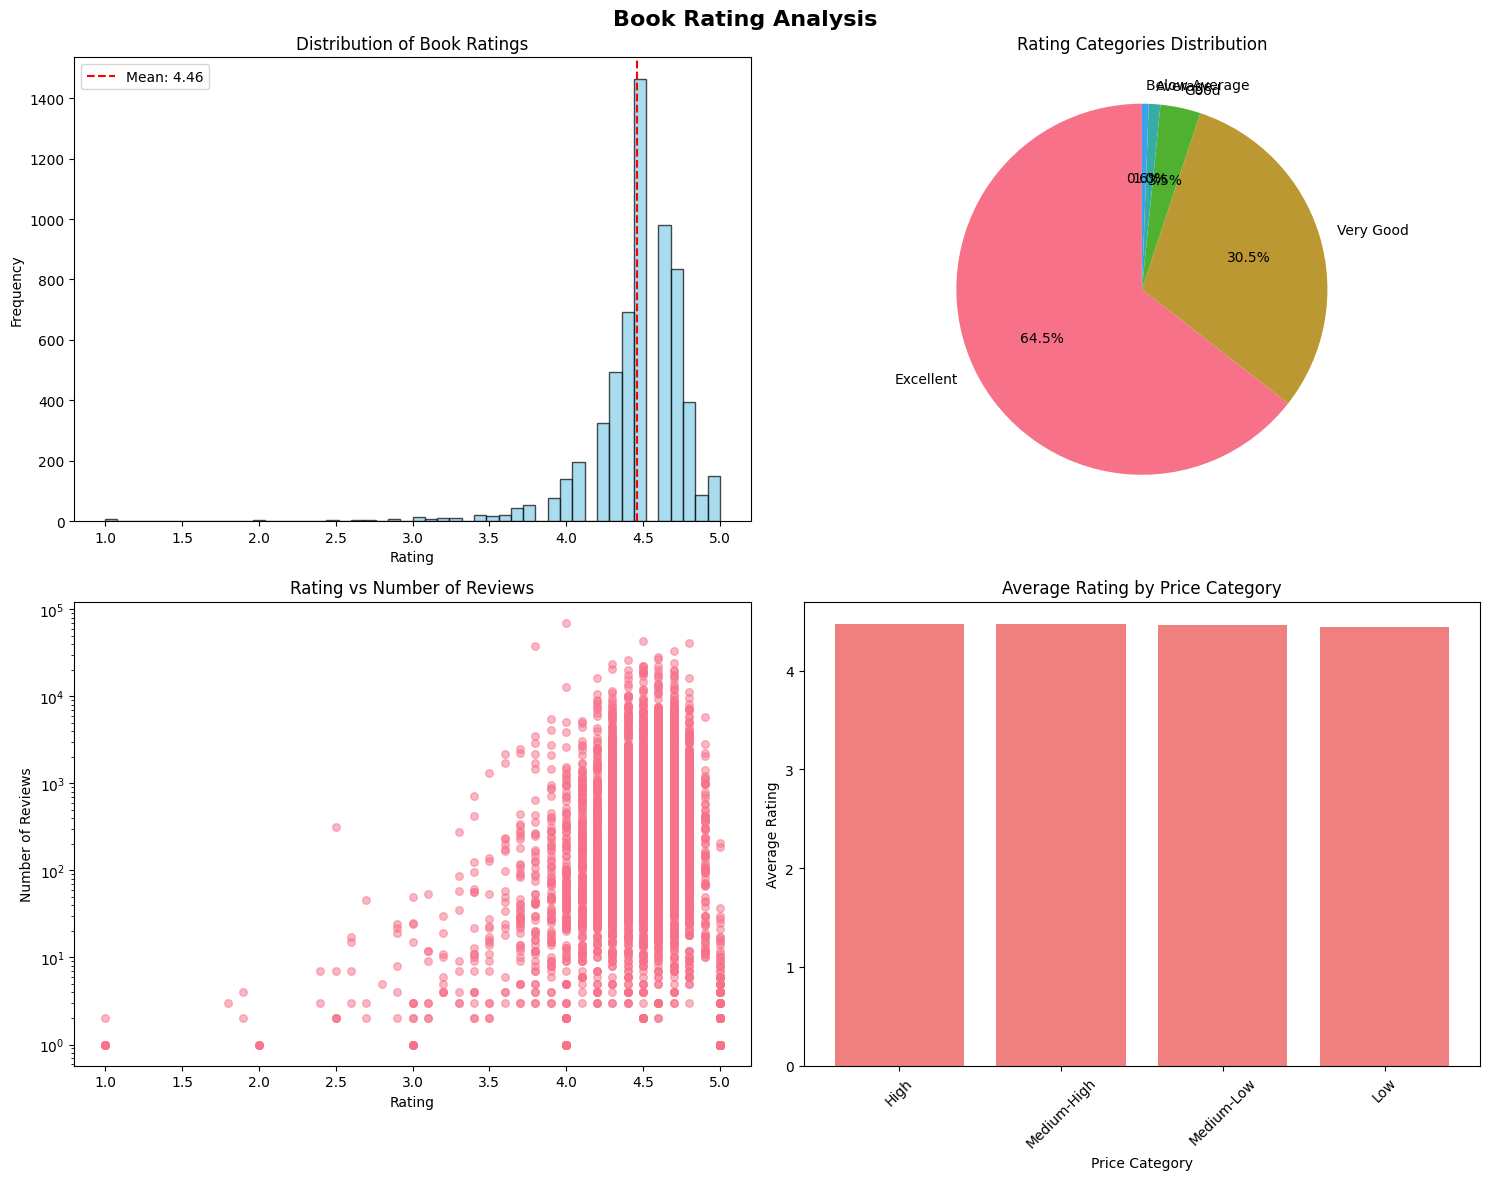

In [12]:
# Create subplots for rating analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Book Rating Analysis', fontsize=16, fontweight='bold')

# Rating distribution
axes[0, 0].hist(df['Rating'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribution of Book Ratings')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Rating'].mean(), color='red', linestyle='--', label=f'Mean: {df["Rating"].mean():.2f}')
axes[0, 0].legend()

# Rating categories
rating_counts = df['Rating_Category'].value_counts()
axes[0, 1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Rating Categories Distribution')

# Rating vs Number of Reviews
axes[1, 0].scatter(df['Rating'], df['Number_of_Reviews'], alpha=0.5, s=30)
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Number of Reviews')
axes[1, 0].set_title('Rating vs Number of Reviews')
axes[1, 0].set_yscale('log')

# Average rating by price category
avg_rating_by_price = df.groupby('Price_Category')['Rating'].mean().sort_values(ascending=False)
axes[1, 1].bar(avg_rating_by_price.index, avg_rating_by_price.values, color='lightcoral')
axes[1, 1].set_title('Average Rating by Price Category')
axes[1, 1].set_xlabel('Price Category')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [13]:
print(f" Rating Statistics:")
print(f"  - Average rating: {df['Rating'].mean():.2f}")
print(f"  - Median rating: {df['Rating'].median():.2f}")
print(f"  - Most common rating range: {df['Rating_Category'].mode().iloc[0]}")


 Rating Statistics:
  - Average rating: 4.46
  - Median rating: 4.50
  - Most common rating range: Excellent


## 4. Price and Popularity Analysis

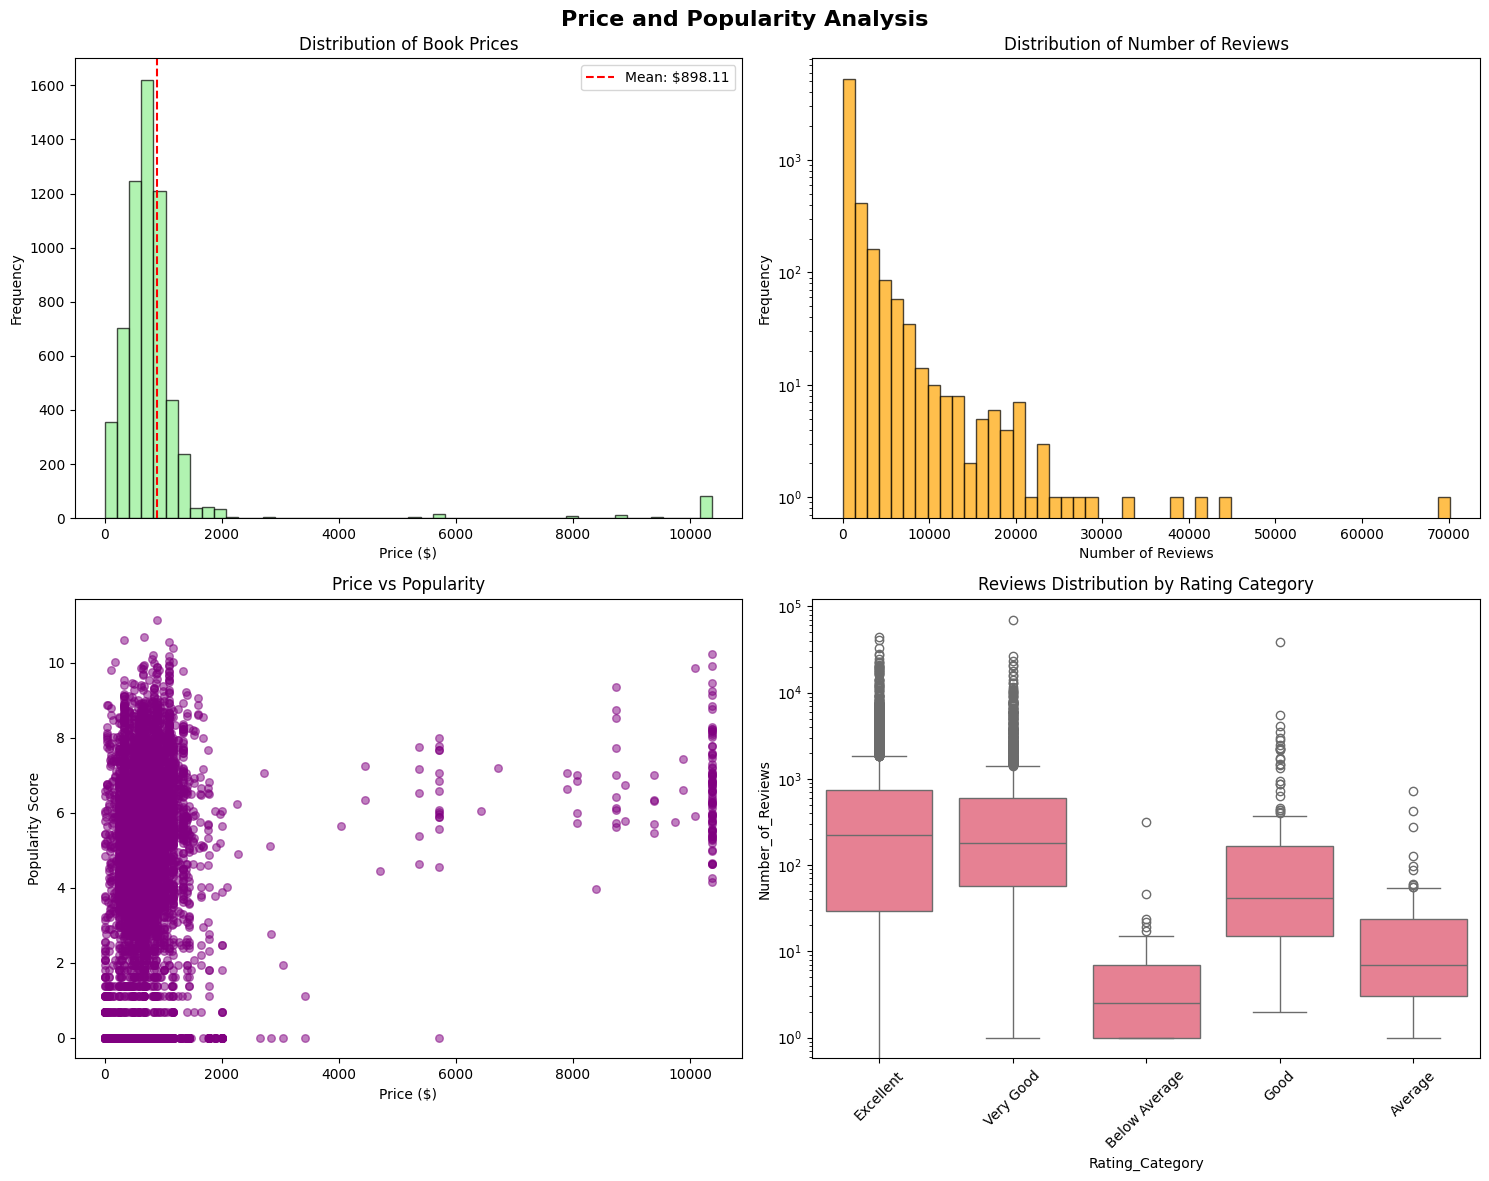

In [14]:
# Create price and popularity visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Price and Popularity Analysis', fontsize=16, fontweight='bold')

# Price distribution
axes[0, 0].hist(df['Price'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 0].set_title('Distribution of Book Prices')
axes[0, 0].set_xlabel('Price ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['Price'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Price"].mean():.2f}')
axes[0, 0].legend()

# Number of reviews distribution (log scale)
axes[0, 1].hist(df['Number_of_Reviews'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Distribution of Number of Reviews')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_yscale('log')

# Price vs Popularity
axes[1, 0].scatter(df['Price'], df['Popularity_Score'], alpha=0.5, s=30, color='purple')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Popularity Score')
axes[1, 0].set_title('Price vs Popularity')

# Reviews by rating category
sns.boxplot(data=df, x='Rating_Category', y='Number_of_Reviews', ax=axes[1, 1])
axes[1, 1].set_title('Reviews Distribution by Rating Category')
axes[1, 1].set_yscale('log')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [15]:
print(f" Price Statistics:")
print(f"  - Average price: ${df['Price'].mean():.2f}")
print(f"  - Median price: ${df['Price'].median():.2f}")
print(f"  - Price range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print()
print(f" Review Statistics:")
print(f"  - Average reviews: {df['Number_of_Reviews'].mean():.0f}")
print(f"  - Median reviews: {df['Number_of_Reviews'].median():.0f}")
print(f"  - Max reviews: {df['Number_of_Reviews'].max():,}")


 Price Statistics:
  - Average price: $898.11
  - Median price: $683.00
  - Price range: $0.00 - $10378.00

 Review Statistics:
  - Average reviews: 841
  - Median reviews: 189
  - Max reviews: 70,122


## 5. Genre Analysis

In [16]:
# Extract all genres and count them
all_genres = []
for genre_list in df['Genres']:
    if isinstance(genre_list, list):
        all_genres.extend(genre_list)

genre_counter = Counter(all_genres)
top_genres = dict(genre_counter.most_common(20))

print(f" Total unique genres: {len(genre_counter)}")
print(f" Books with genre information: {sum(1 for g in df['Genres'] if len(g) > 0)}")
print()

 Total unique genres: 2580
 Books with genre information: 2047



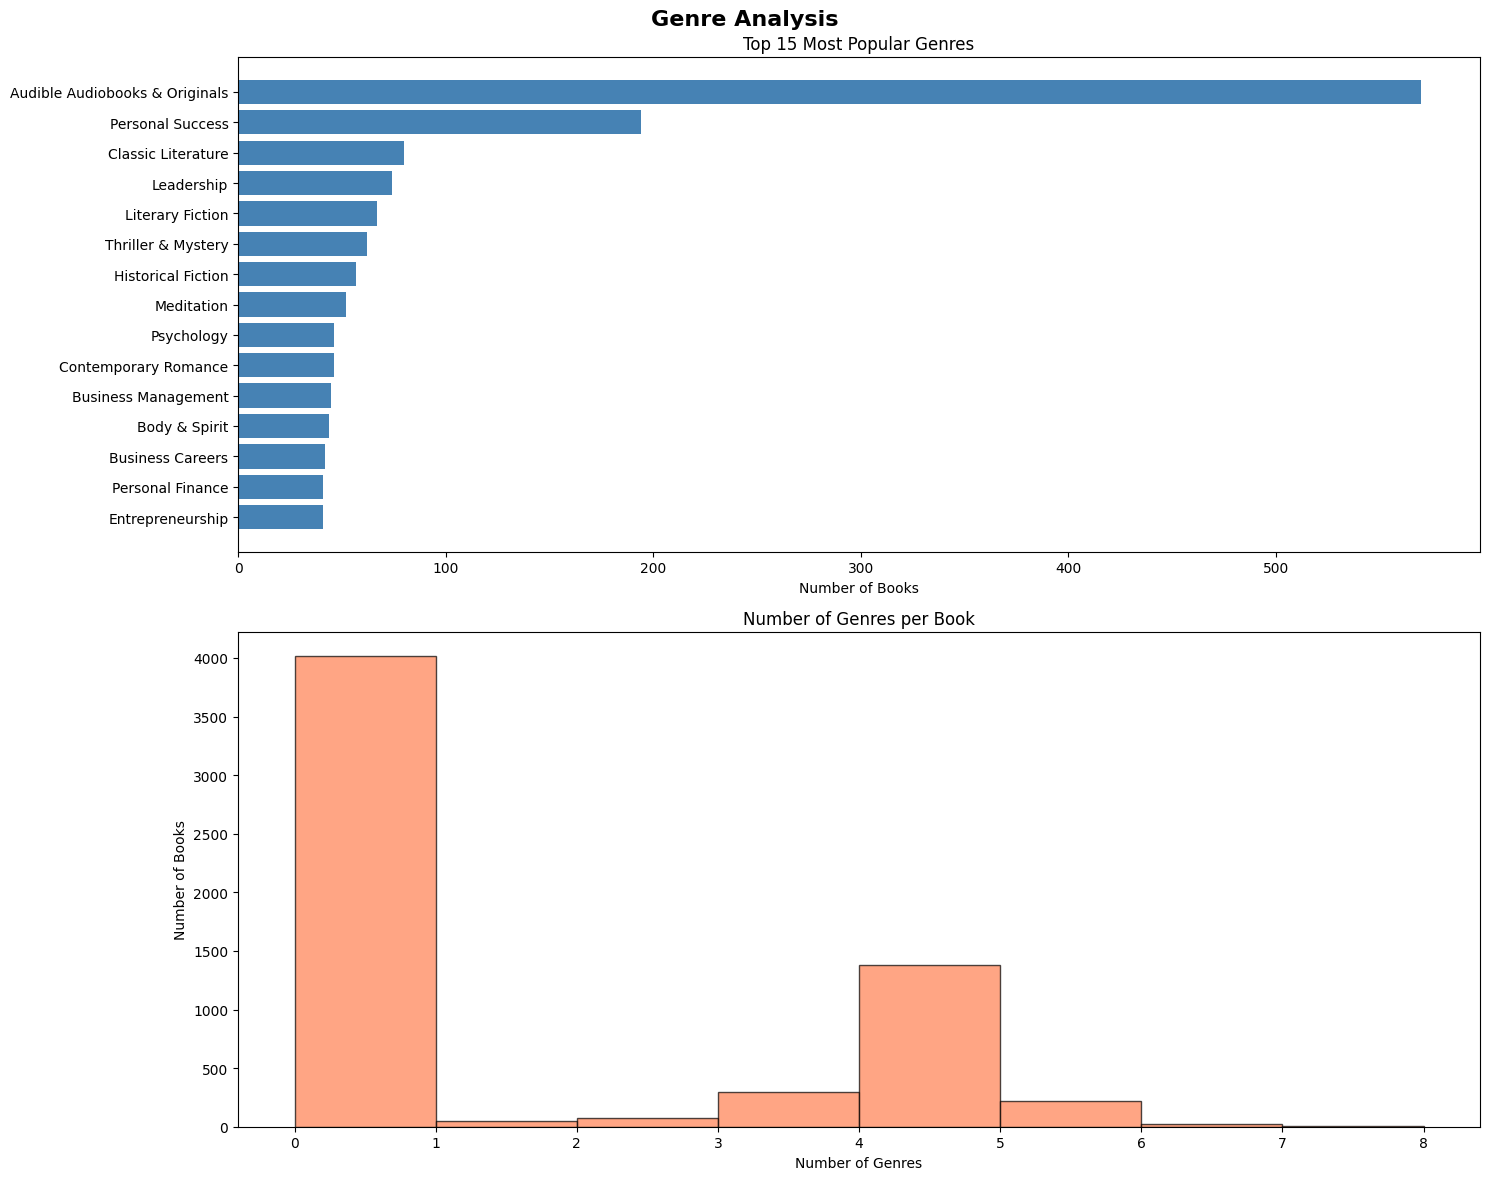

In [17]:
# Create genre visualizations
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Genre Analysis', fontsize=16, fontweight='bold')

# Top 15 genres bar chart
top_15_genres = dict(list(top_genres.items())[:15])
axes[0].barh(list(top_15_genres.keys())[::-1], list(top_15_genres.values())[::-1], color='steelblue')
axes[0].set_title('Top 15 Most Popular Genres')
axes[0].set_xlabel('Number of Books')

# Genre diversity - number of genres per book
genres_per_book = [len(g) for g in df['Genres'] if isinstance(g, list)]
axes[1].hist(genres_per_book, bins=range(0, max(genres_per_book)+2), alpha=0.7, color='coral', edgecolor='black')
axes[1].set_title('Number of Genres per Book')
axes[1].set_xlabel('Number of Genres')
axes[1].set_ylabel('Number of Books')

plt.tight_layout()
plt.show()


In [18]:
print(" Top 10 Genres:")
for i, (genre, count) in enumerate(list(top_genres.items())[:10], 1):
    print(f"  {i:2d}. {genre}: {count:,} books")


 Top 10 Genres:
   1. Audible Audiobooks & Originals: 570 books
   2. Personal Success: 194 books
   3. Classic Literature: 80 books
   4. Leadership: 74 books
   5. Literary Fiction: 67 books
   6. Thriller & Mystery: 62 books
   7. Historical Fiction: 57 books
   8. Meditation: 52 books
   9. Psychology: 46 books
  10. Contemporary Romance: 46 books


## 6. Author Analysis

In [23]:
# Top authors by number of books
author_counts = df['Author'].value_counts().head(20)
print(" Most Prolific Authors (by book count):")
print(author_counts.head(10))
print()


 Most Prolific Authors (by book count):
Author
OSHO                            32
Harvard Business Review         32
Devdutt Pattanaik               29
Innovative Language Learning    28
Ruskin Bond                     28
Rick Riordan                    26
Agatha Christie                 24
Brian Tracy                     22
Roald Dahl                      20
Robin Sharma                    20
Name: count, dtype: int64



In [24]:
# Top authors by average rating (minimum 3 books)
author_ratings = df.groupby('Author').agg({
    'Rating': 'mean',
    'Book_Name': 'count',
    'Number_of_Reviews': 'sum'
}).rename(columns={'Book_Name': 'Book_Count', 'Number_of_Reviews': 'Total_Reviews'})

top_rated_authors = author_ratings[author_ratings['Book_Count'] >= 3].sort_values('Rating', ascending=False).head(10)
print(" Highest Rated Authors (minimum 3 books):")
top_rated_authors


 Highest Rated Authors (minimum 3 books):


,Rating,Book_Count,Total_Reviews
Author,,,
Tracey West,4.866667,3,1633
Tui T. Sutherland,4.855556,9,10410
Bill Johnson,4.800000,3,969
J. Krishnamurti,4.800000,3,36
Joyce Meyer,4.800000,3,1178
Watchman Nee,4.800000,3,819
Alan Watts,4.800000,5,349
Anodea Judith,4.800000,3,1567
Norman Bridwell,4.780000,5,1209


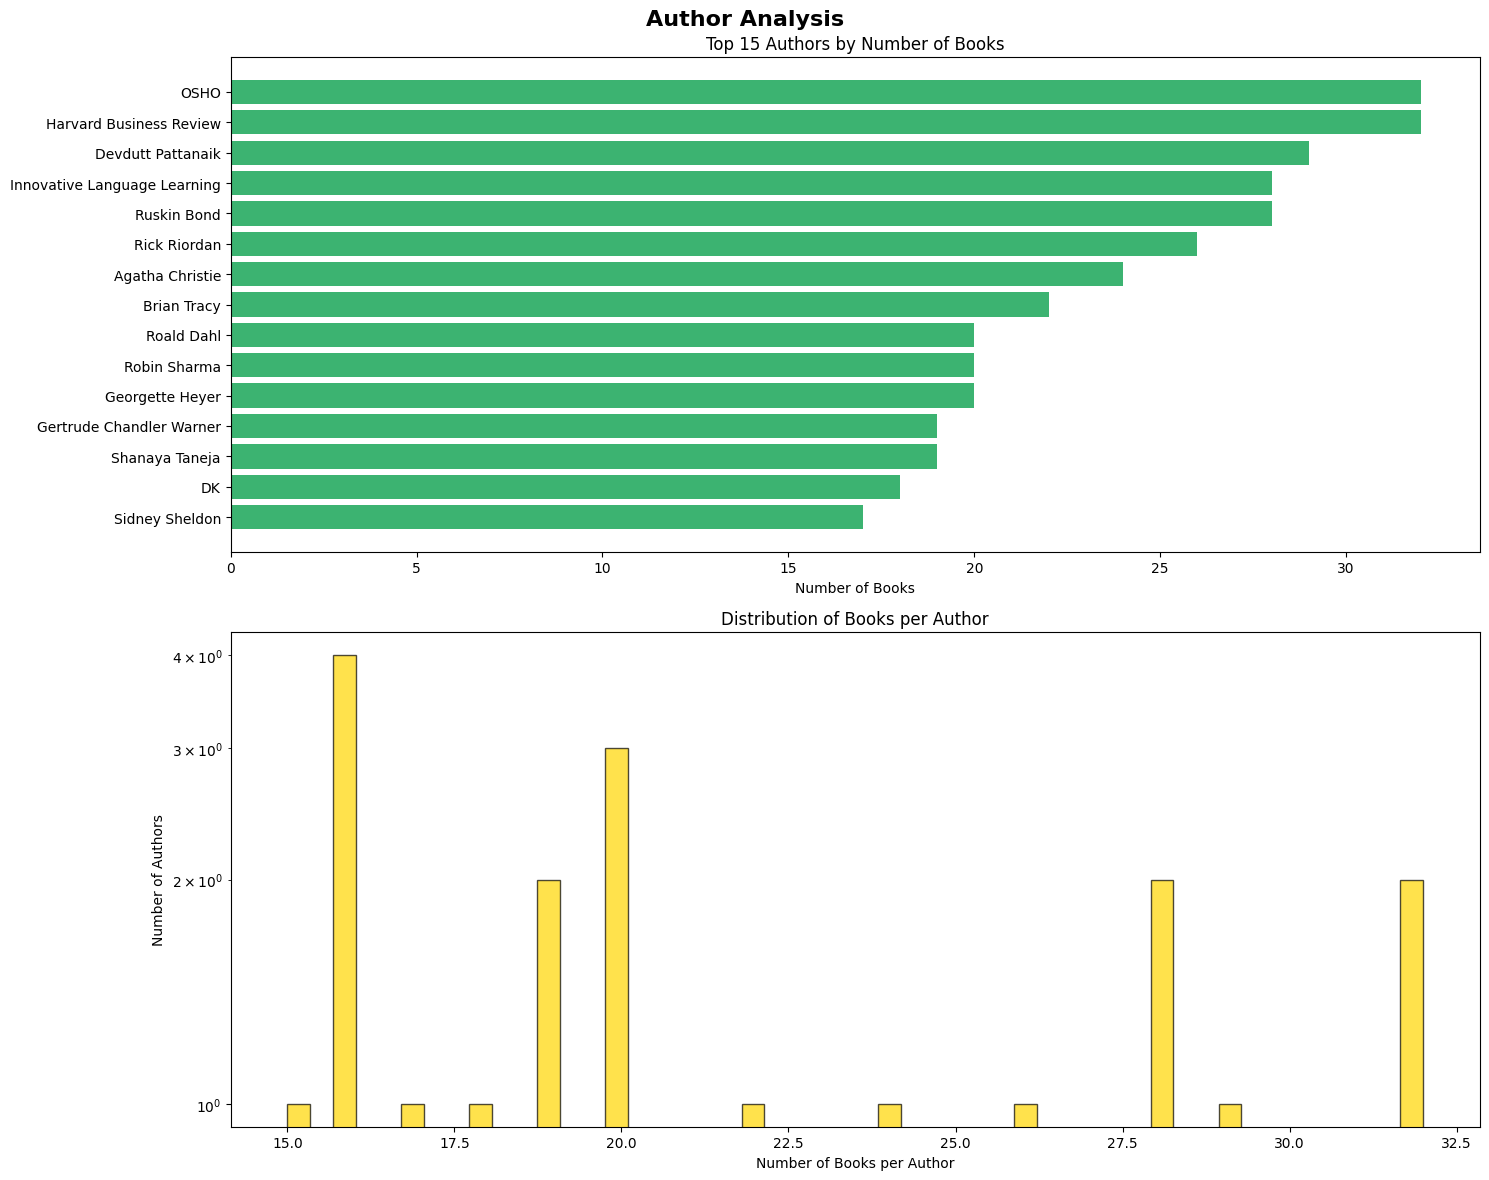

In [25]:
# Create author visualizations
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Author Analysis', fontsize=16, fontweight='bold')

# Top authors by book count
axes[0].barh(author_counts.head(15).index[::-1], author_counts.head(15).values[::-1], color='mediumseagreen')
axes[0].set_title('Top 15 Authors by Number of Books')
axes[0].set_xlabel('Number of Books')

# Distribution of books per author
books_per_author = author_counts.values
axes[1].hist(books_per_author, bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1].set_title('Distribution of Books per Author')
axes[1].set_xlabel('Number of Books per Author')
axes[1].set_ylabel('Number of Authors')
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()

## 7. Listening Time Analysis

In [26]:
# Listening time statistics
df_with_time = df[df['Listening_Time_Minutes'] > 0]
print(f" Listening Time Statistics:")
print(f"  - Books with listening time data: {len(df_with_time):,}")
print(f"  - Average listening time: {df_with_time['Listening_Time_Minutes'].mean():.0f} minutes ({df_with_time['Listening_Time_Minutes'].mean()/60:.1f} hours)")
print(f"  - Median listening time: {df_with_time['Listening_Time_Minutes'].median():.0f} minutes ({df_with_time['Listening_Time_Minutes'].median()/60:.1f} hours)")
print(f"  - Shortest book: {df_with_time['Listening_Time_Minutes'].min():.0f} minutes")
print(f"  - Longest book: {df_with_time['Listening_Time_Minutes'].max():.0f} minutes ({df_with_time['Listening_Time_Minutes'].max()/60:.1f} hours)")


 Listening Time Statistics:
  - Books with listening time data: 6,065
  - Average listening time: 530 minutes (8.8 hours)
  - Median listening time: 490 minutes (8.2 hours)
  - Shortest book: 3 minutes
  - Longest book: 7591 minutes (126.5 hours)


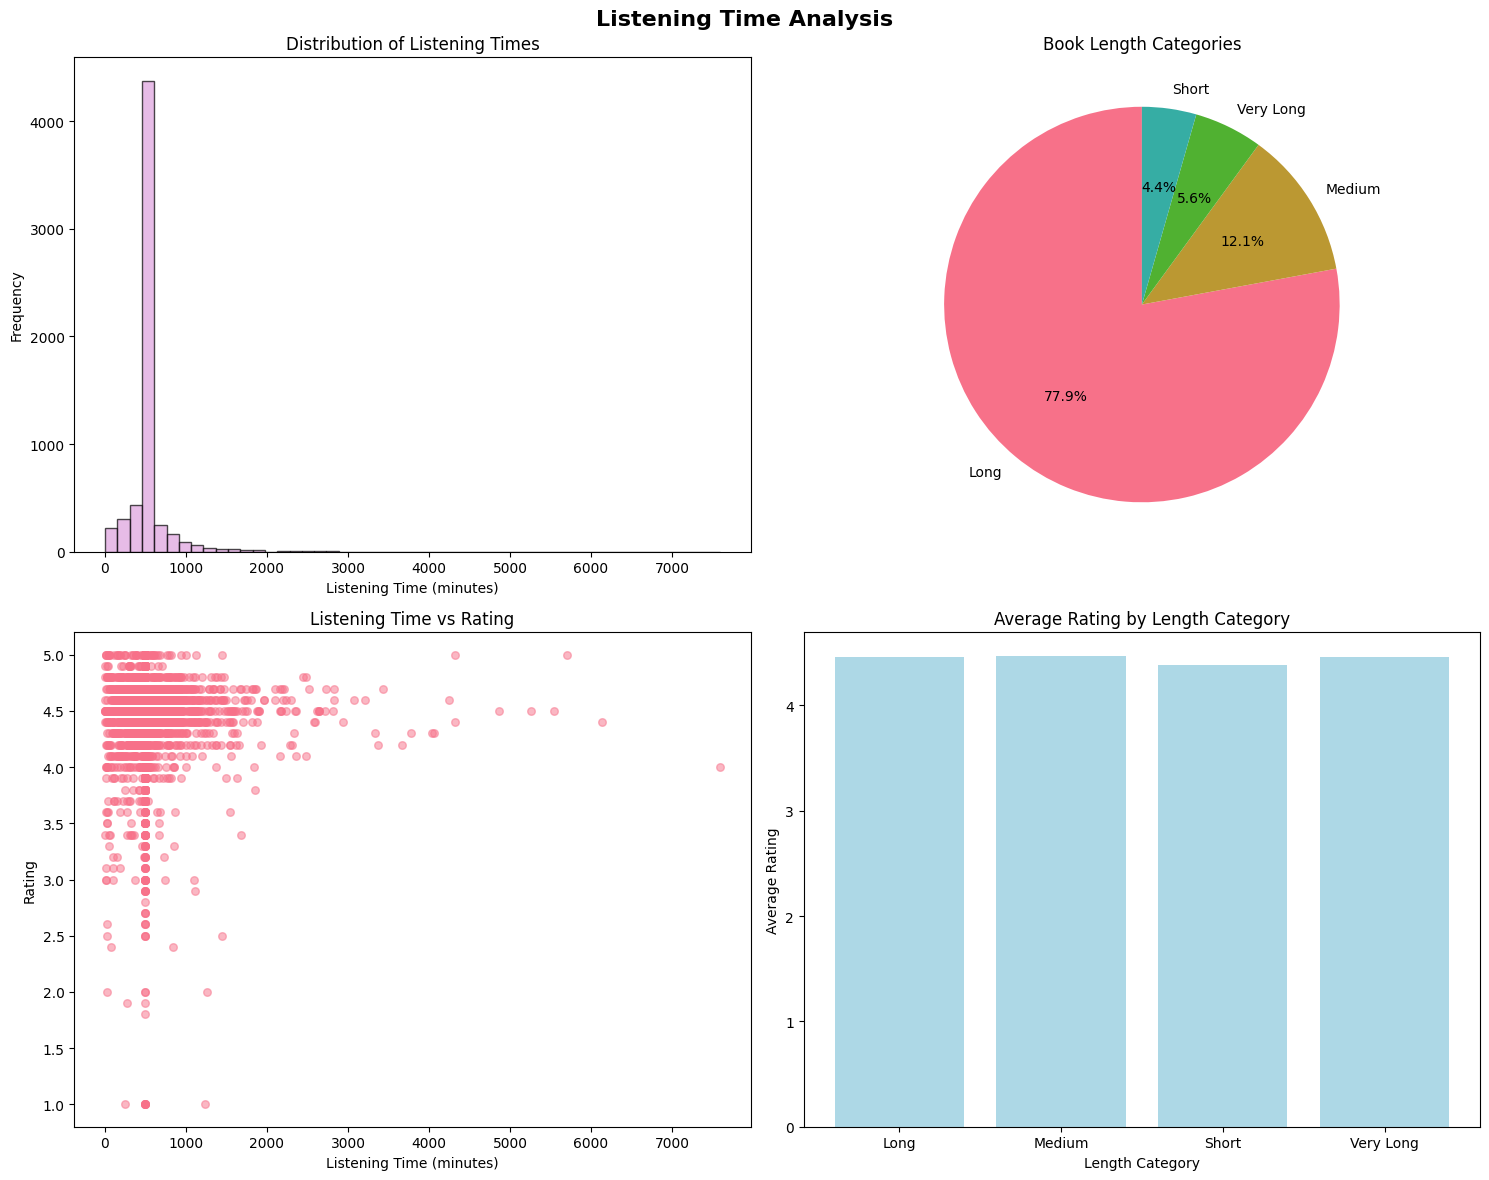

In [27]:
# Create listening time visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Listening Time Analysis', fontsize=16, fontweight='bold')

# Listening time distribution
axes[0, 0].hist(df_with_time['Listening_Time_Minutes'], bins=50, alpha=0.7, color='plum', edgecolor='black')
axes[0, 0].set_title('Distribution of Listening Times')
axes[0, 0].set_xlabel('Listening Time (minutes)')
axes[0, 0].set_ylabel('Frequency')

# Length categories
length_counts = df['Length_Category'].value_counts()
axes[0, 1].pie(length_counts.values, labels=length_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Book Length Categories')

# Listening time vs Rating
axes[1, 0].scatter(df_with_time['Listening_Time_Minutes'], df_with_time['Rating'], alpha=0.5, s=30)
axes[1, 0].set_xlabel('Listening Time (minutes)')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_title('Listening Time vs Rating')

# Average rating by length category
avg_rating_by_length = df.groupby('Length_Category')['Rating'].mean()
axes[1, 1].bar(avg_rating_by_length.index, avg_rating_by_length.values, color='lightblue')
axes[1, 1].set_title('Average Rating by Length Category')
axes[1, 1].set_xlabel('Length Category')
axes[1, 1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


## 8. Correlation Analysis

In [28]:
# Select numerical columns for correlation
numerical_cols = ['Rating', 'Number_of_Reviews', 'Price', 'Listening_Time_Minutes', 'Popularity_Score', 'Description_Length']
correlation_matrix = df[numerical_cols].corr()


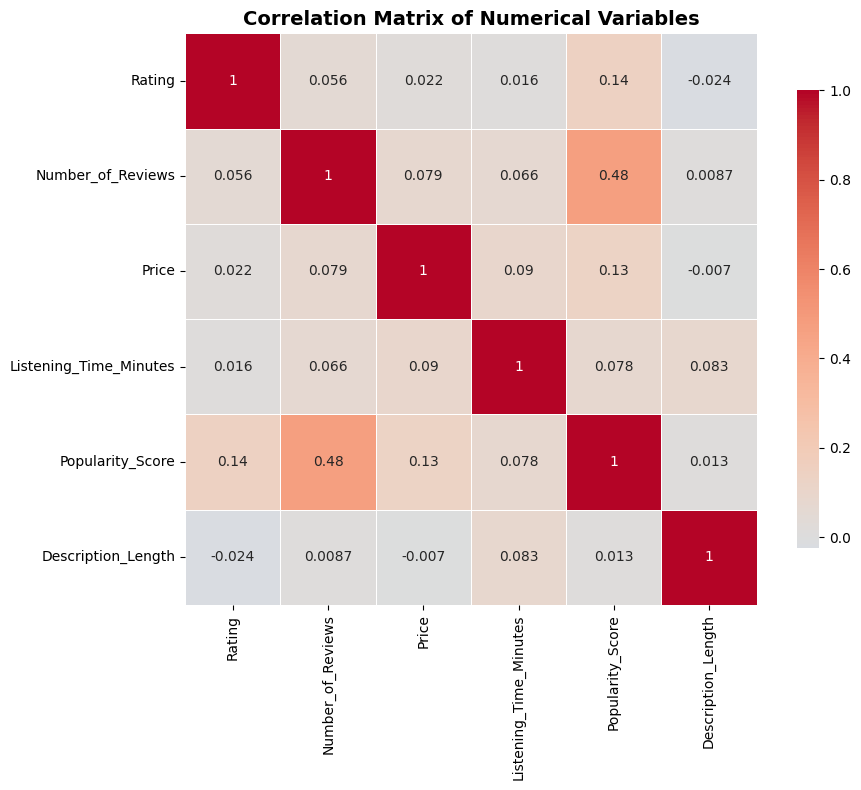

In [29]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
print(" Key Correlations:")
# Get the most significant correlations
correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlations.append({
            'var1': correlation_matrix.columns[i],
            'var2': correlation_matrix.columns[j],
            'correlation': correlation_matrix.iloc[i, j]
        })
# Sort by absolute correlation value
correlations.sort(key=lambda x: abs(x['correlation']), reverse=True)

for corr in correlations[:8]:
    print(f"  - {corr['var1']} ↔ {corr['var2']}: {corr['correlation']:.3f}")


 Key Correlations:
  - Number_of_Reviews ↔ Popularity_Score: 0.476
  - Rating ↔ Popularity_Score: 0.145
  - Price ↔ Popularity_Score: 0.131
  - Price ↔ Listening_Time_Minutes: 0.090
  - Listening_Time_Minutes ↔ Description_Length: 0.083
  - Number_of_Reviews ↔ Price: 0.079
  - Listening_Time_Minutes ↔ Popularity_Score: 0.078
  - Number_of_Reviews ↔ Listening_Time_Minutes: 0.066


## 9. High-Value Books Analysis

In [32]:
# Define different categories of high-value books

# 1. Hidden Gems: High rating, low review count
hidden_gems = df[(df['Rating'] >= 4.5) & (df['Number_of_Reviews'] < 100) & (df['Number_of_Reviews'] > 5)]
print(f" Hidden Gems (Rating ≥ 4.5, Reviews < 100): {len(hidden_gems)} books")


 Hidden Gems (Rating ≥ 4.5, Reviews < 100): 700 books


In [33]:
# 2. Bestsellers: High rating, high review count
bestsellers = df[(df['Rating'] >= 4.3) & (df['Number_of_Reviews'] >= 1000)]
print(f" Bestsellers (Rating ≥ 4.3, Reviews ≥ 1000): {len(bestsellers)} books")


 Bestsellers (Rating ≥ 4.3, Reviews ≥ 1000): 1026 books


In [34]:
# 3. Premium books: High price, high rating
premium_books = df[(df['Price'] >= df['Price'].quantile(0.9)) & (df['Rating'] >= 4.5)]
print(f" Premium Books (Top 10% price, Rating ≥ 4.5): {len(premium_books)} books")



 Premium Books (Top 10% price, Rating ≥ 4.5): 442 books



🔸 Top 10 Hidden Gems:
  - 27 Essential Principles of Story: Master the Secre... by Daniel Joshua Rubin (Rating: 5.0, Reviews: 7)
  - Coming Home to Yourself: A Meditator's Guide to Bl... by Osho (Rating: 5.0, Reviews: 16)
  - Discover Your True North: Expanded and Updated Edi... by Bill George (Rating: 5.0, Reviews: 14)
  - Energy Healing for Trauma, Stress & Chronic Illnes... by Cyndi Dale (Rating: 5.0, Reviews: 17)
  - Enterprise Agility: Being Agile in a Changing Worl... by Sunil Mundra (Rating: 5.0, Reviews: 10)
  - Exploring Vibrational Medicine... by Richard Gerber (Rating: 5.0, Reviews: 8)
  - Fighting for You: Bragan University Series, Book 2... by Gianna Gabriela (Rating: 5.0, Reviews: 11)
  - Finding Ultra: Rejecting Middle Age, Becoming One ... by Rich Roll (Rating: 5.0, Reviews: 6)
  - From a Mountain in Tibet: A Monk’s Journey... by Lama Yeshe Losal Rinpoche (Rating: 5.0, Reviews: 15)
  - From Mindfulness to Insight: Meditations to Releas... by Rob Nairn (Rating: 5.0, Rev

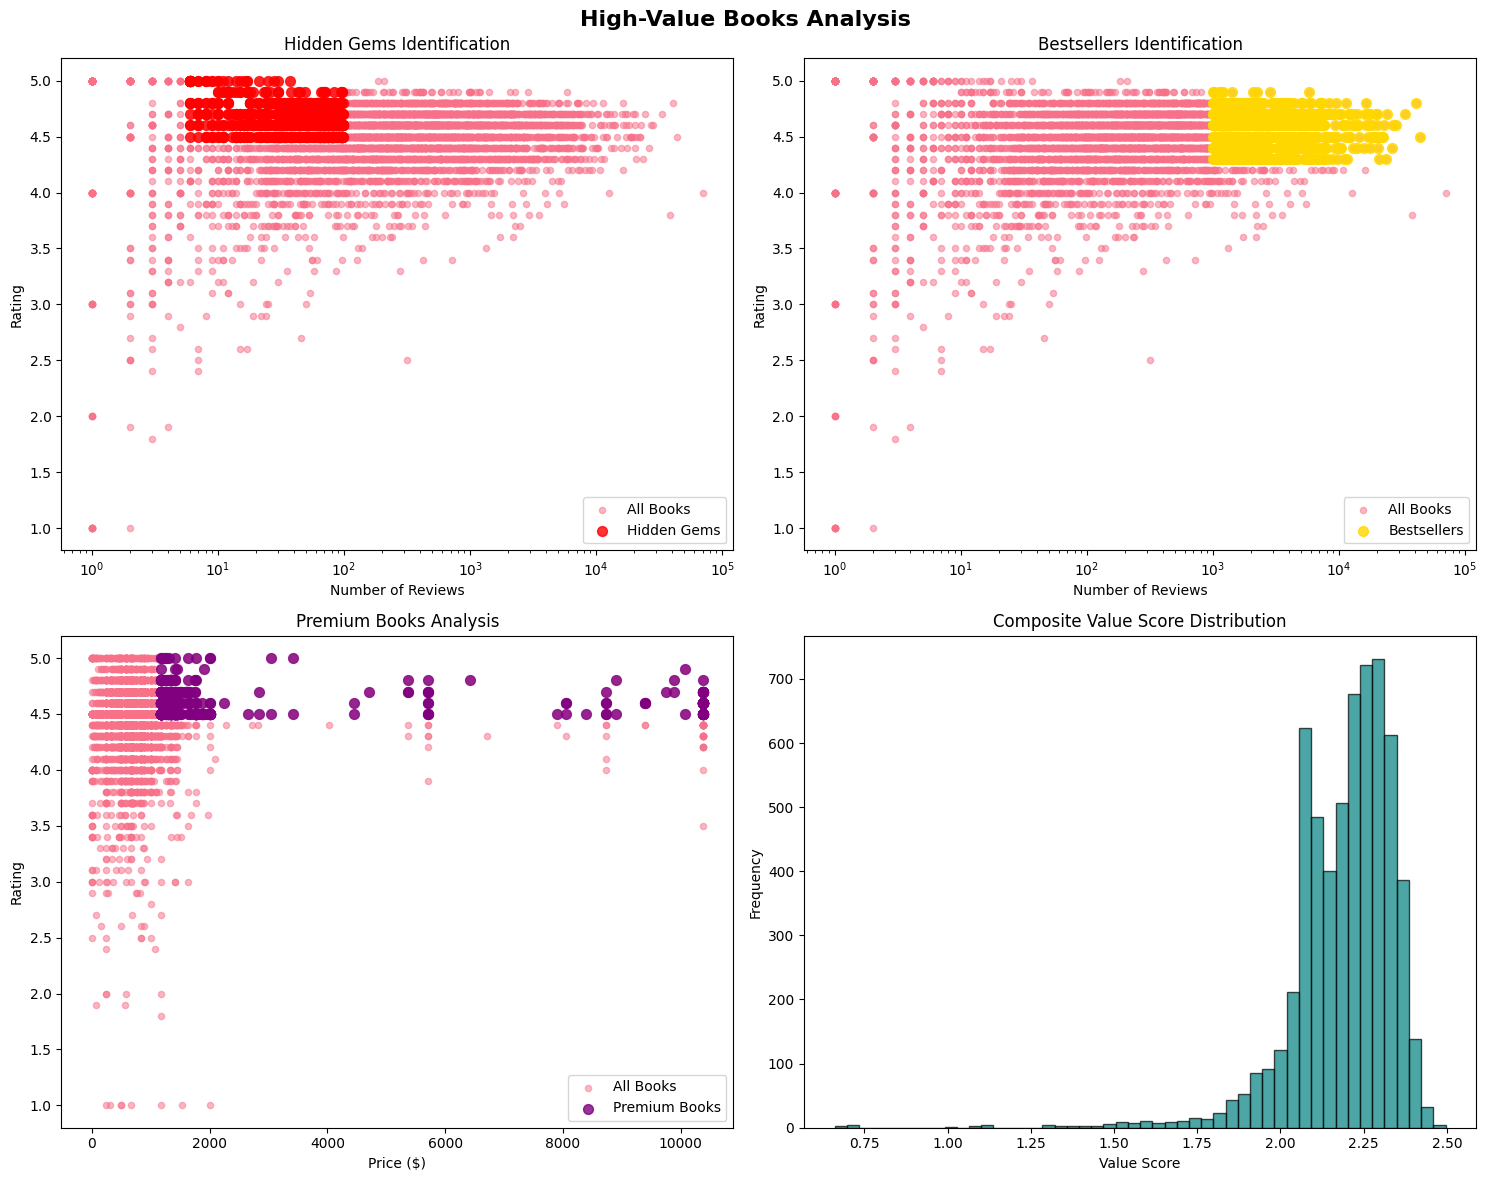

In [38]:
# Create value analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('High-Value Books Analysis', fontsize=16, fontweight='bold')

# Hidden gems scatter plot
axes[0, 0].scatter(df['Number_of_Reviews'], df['Rating'], alpha=0.5, s=20, label='All Books')
axes[0, 0].scatter(hidden_gems['Number_of_Reviews'], hidden_gems['Rating'], 
                   alpha=0.8, s=50, color='red', label='Hidden Gems')
axes[0, 0].set_xlabel('Number of Reviews')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].set_title('Hidden Gems Identification')
axes[0, 0].set_xscale('log')
axes[0, 0].legend()

# Top hidden gems
top_hidden_gems = hidden_gems.nlargest(10, 'Rating')[['Book_Name', 'Author', 'Rating', 'Number_of_Reviews']]
print("\n🔸 Top 10 Hidden Gems:")
for idx, row in top_hidden_gems.iterrows():
    print(f"  - {row['Book_Name'][:50]}... by {row['Author']} (Rating: {row['Rating']}, Reviews: {row['Number_of_Reviews']})")

# Bestsellers analysis
axes[0, 1].scatter(df['Number_of_Reviews'], df['Rating'], alpha=0.5, s=20, label='All Books')
axes[0, 1].scatter(bestsellers['Number_of_Reviews'], bestsellers['Rating'], 
                   alpha=0.8, s=50, color='gold', label='Bestsellers')
axes[0, 1].set_xlabel('Number of Reviews')
axes[0, 1].set_ylabel('Rating')
axes[0, 1].set_title('Bestsellers Identification')
axes[0, 1].set_xscale('log')
axes[0, 1].legend()


# Price vs Rating for premium books
axes[1, 0].scatter(df['Price'], df['Rating'], alpha=0.5, s=20, label='All Books')
axes[1, 0].scatter(premium_books['Price'], premium_books['Rating'], 
                   alpha=0.8, s=50, color='purple', label='Premium Books')
axes[1, 0].set_xlabel('Price ($)')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_title('Premium Books Analysis')
axes[1, 0].legend()


# Value score distribution
# Create a composite value score
df['Value_Score'] = (df['Rating'] * 0.4 + 
                    (df['Popularity_Score'] / df['Popularity_Score'].max()) * 0.3 + 
                    (1 - df['Price'] / df['Price'].max()) * 0.3)

axes[1, 1].hist(df['Value_Score'], bins=50, alpha=0.7, color='teal', edgecolor='black')
axes[1, 1].set_title('Composite Value Score Distribution')
axes[1, 1].set_xlabel('Value Score')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 10. Genre-Based Insights

In [39]:
# Analyze ratings and popularity by genre
genre_stats = {}
for genre in list(top_genres.keys())[:10]:  # Top 10 genres
    books_in_genre = df[df['Genres'].apply(lambda x: genre in x if isinstance(x, list) else False)]
    if len(books_in_genre) > 0:
        genre_stats[genre] = {
            'count': len(books_in_genre),
            'avg_rating': books_in_genre['Rating'].mean(),
            'avg_reviews': books_in_genre['Number_of_Reviews'].mean(),
            'avg_price': books_in_genre['Price'].mean()
        }

# Convert to DataFrame for easier analysis
genre_df = pd.DataFrame(genre_stats).T
genre_df = genre_df.sort_values('avg_rating', ascending=False)


In [40]:
print(" Top Genres Analysis:")
print(genre_df.round(2))


 Top Genres Analysis:
                                count  avg_rating  avg_reviews  avg_price
Meditation                       43.0        4.60       863.70     641.44
Leadership                       74.0        4.52       699.01    1340.43
Personal Success                194.0        4.48      1132.80    1042.87
Audible Audiobooks & Originals  570.0        4.48      2190.06    1158.25
Psychology                       46.0        4.40      1240.98     866.41
Contemporary Romance             46.0        4.38      2238.61     956.87
Classic Literature               80.0        4.36      1444.98    1054.49
Historical Fiction               50.0        4.35      1997.64     847.20
Thriller & Mystery               62.0        4.34      3448.02    1023.60
Literary Fiction                 67.0        4.31      2876.96    1248.97


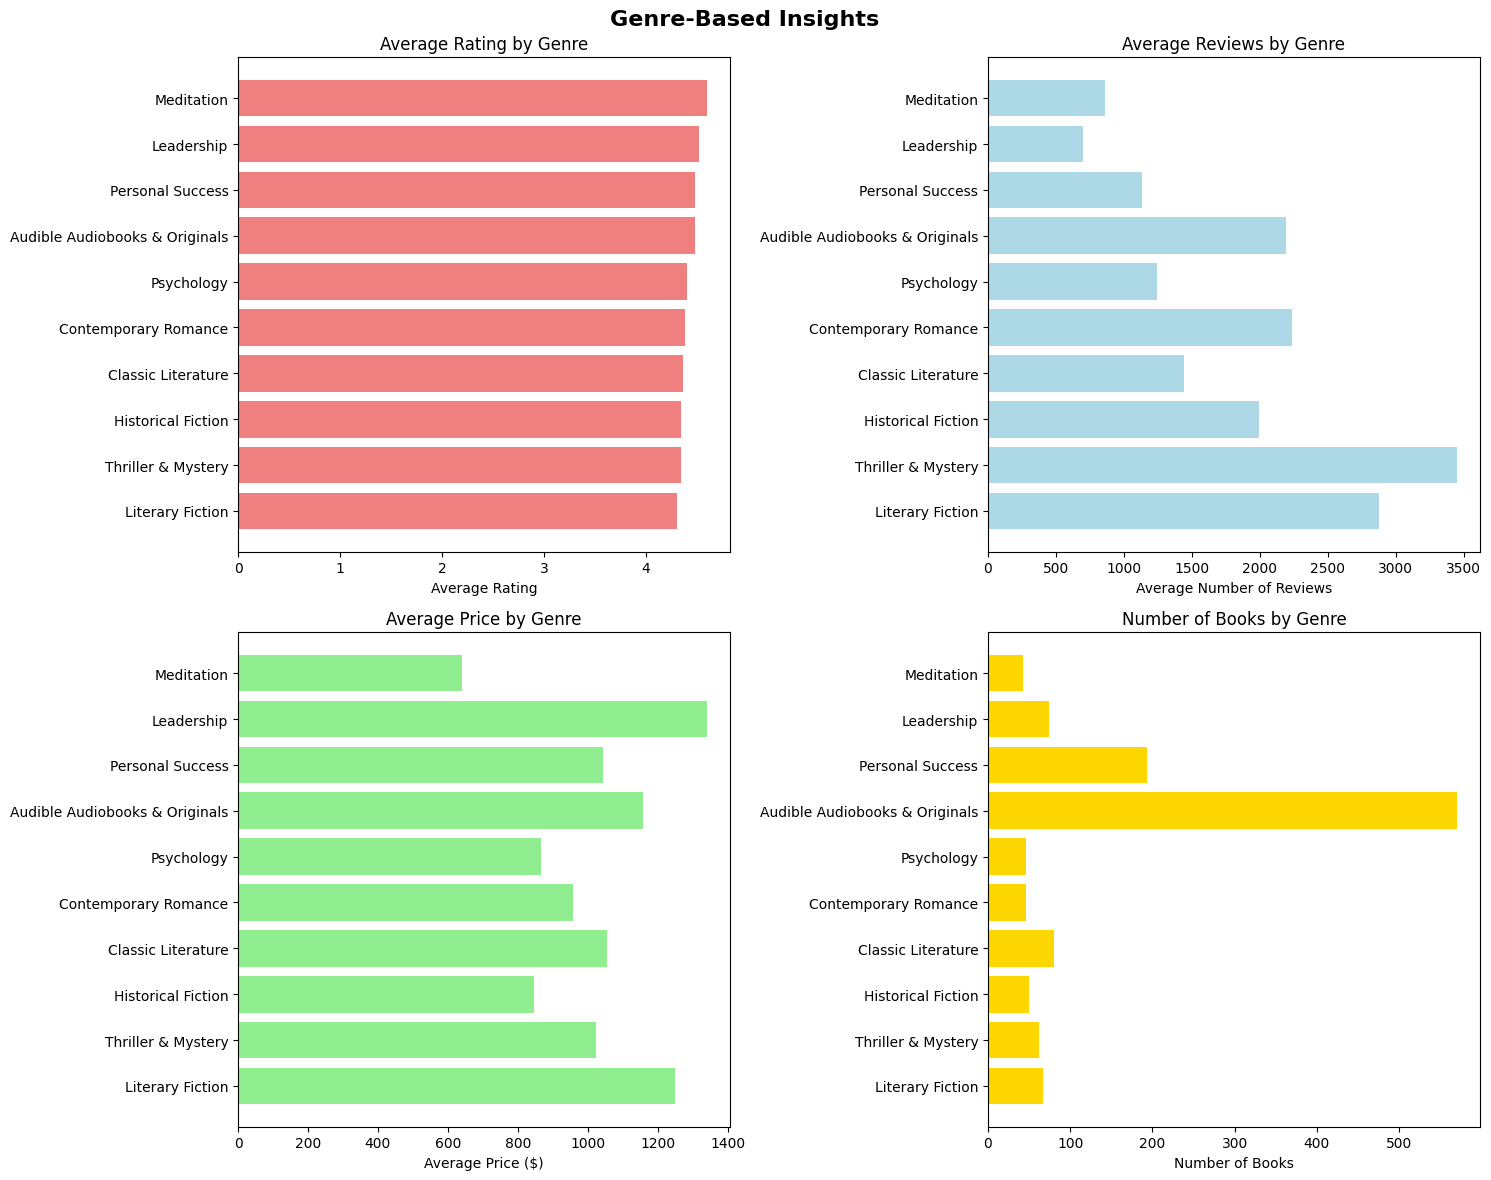

In [41]:
# Create genre insights visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Genre-Based Insights', fontsize=16, fontweight='bold')

# Average rating by genre
axes[0, 0].barh(genre_df.index[::-1], genre_df['avg_rating'][::-1], color='lightcoral')
axes[0, 0].set_title('Average Rating by Genre')
axes[0, 0].set_xlabel('Average Rating')

# Average reviews by genre
axes[0, 1].barh(genre_df.index[::-1], genre_df['avg_reviews'][::-1], color='lightblue')
axes[0, 1].set_title('Average Reviews by Genre')
axes[0, 1].set_xlabel('Average Number of Reviews')

# Average price by genre
axes[1, 0].barh(genre_df.index[::-1], genre_df['avg_price'][::-1], color='lightgreen')
axes[1, 0].set_title('Average Price by Genre')
axes[1, 0].set_xlabel('Average Price ($)')

# Book count by genre
axes[1, 1].barh(genre_df.index[::-1], genre_df['count'][::-1], color='gold')
axes[1, 1].set_title('Number of Books by Genre')
axes[1, 1].set_xlabel('Number of Books')

plt.tight_layout()
plt.show()

## 11. Key Insights Summary

In [42]:
print(" RATING INSIGHTS:")
print(f"  • Average book rating: {df['Rating'].mean():.2f}/5.0")
print(f"  • {(df['Rating'] >= 4.0).mean()*100:.1f}% of books have ratings ≥ 4.0")
print(f"  • Most common rating category: {df['Rating_Category'].mode().iloc[0]}")
print()

print(" PRICING INSIGHTS:")
print(f"  • Average book price: ${df['Price'].mean():.2f}")
print(f"  • Price range: ${df['Price'].min():.2f} - ${df['Price'].max():.2f}")
print(f"  • Most books are in {df['Price_Category'].mode().iloc[0]} price category")
print()

print(" GENRE INSIGHTS:")
print(f"  • Most popular genre: {list(top_genres.keys())[0]} ({list(top_genres.values())[0]:,} books)")
print(f"  • Average genres per book: {np.mean([len(g) for g in df['Genres'] if isinstance(g, list)]):.1f}")
print(f"  • {len(genre_counter)} unique genres total")
print()

print(" AUTHOR INSIGHTS:")
print(f"  • Most prolific author: {author_counts.index[0]} ({author_counts.iloc[0]} books)")
print(f"  • Average books per author: {author_counts.mean():.1f}")
print(f"  • {len(author_counts)} unique authors")
print()

print(" LISTENING TIME INSIGHTS:")
print(f"  • Average listening time: {df_with_time['Listening_Time_Minutes'].mean()/60:.1f} hours")
print(f"  • Most books are {df['Length_Category'].mode().iloc[0]} length")
print()

print(" VALUE INSIGHTS:")
print(f"  • Hidden gems available: {len(hidden_gems)} books")
print(f"  • Bestsellers identified: {len(bestsellers)} books")
print(f"  • Premium options: {len(premium_books)} books")
print()

print(" CORRELATION INSIGHTS:")
strongest_corr = max(correlations, key=lambda x: abs(x['correlation']))
print(f"  • Strongest correlation: {strongest_corr['var1']} ↔ {strongest_corr['var2']} ({strongest_corr['correlation']:.3f})")
print()


 RATING INSIGHTS:
  • Average book rating: 4.46/5.0
  • 94.9% of books have ratings ≥ 4.0
  • Most common rating category: Excellent

 PRICING INSIGHTS:
  • Average book price: $898.11
  • Price range: $0.00 - $10378.00
  • Most books are in Low price category

 GENRE INSIGHTS:
  • Most popular genre: Audible Audiobooks & Originals (570 books)
  • Average genres per book: 1.3
  • 2580 unique genres total

 AUTHOR INSIGHTS:
  • Most prolific author: OSHO (32 books)
  • Average books per author: 21.6
  • 20 unique authors

 LISTENING TIME INSIGHTS:
  • Average listening time: 8.8 hours
  • Most books are Long length

 VALUE INSIGHTS:
  • Hidden gems available: 700 books
  • Bestsellers identified: 1026 books
  • Premium options: 442 books

 CORRELATION INSIGHTS:
  • Strongest correlation: Number_of_Reviews ↔ Popularity_Score (0.476)

